<a href="https://colab.research.google.com/github/anagardeazabal/ProjetointrodutorioRJ/blob/main/Analise_dados_RJ_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de dados com infos do Rio de Janeiro (Airbnb).

<p align="center">
<img src='https://tm.ibxk.com.br/2017/06/12/12190700114500.jpg?ims=1120x420' width="500"/>
</p>


*Url de dataset de Março de 2021:* http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-03-21/visualisations/listings.csv

O AirBnb é uma das maiores empresas hoteleiras do mundo, sem possuir hotel. A startup foi fundada há 10 anos e já hospedou mais de 300 milhões de pessoas ao redor do mundo, o que é uma revolução na hotelaria tradicional.

Neste notebook, vamos explorar um pouco da cidade do Rio de Janeiro. Segundo a EMBRATUR, é o destino mais procurado pelos turistas estrangeiros que visitam o Brasil a lazer. 

#Qual o objetivo da análise? 

O objetivo é analisar e mapear as hospedagens através da identificação do tipo de dados e suas variáveis. 

# Obtenção dos dados

Os dados foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html). Esta é uma base de dados públicos disponibilizados pelo próprio Airbnb.
Para esta análise vamos utilizar o arquivo `listings.csv` disponibilizado.

In [1]:
## para uso externo de bibliotecas
!pip install missingno
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno ## melhor visualizacao de valores faltantes

#visualizacao 
sns.set_style ('darkgrid')
sns.set_palette ('Accent')

In [2]:
##coleta
data = 'http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-03-21/visualisations/listings.csv'
df = pd.read_csv(data)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,200,5,260,2021-02-08,2.00,1,334
1,24480,Nice and cozy near Ipanema Beach,99249,Goya,NaN,Ipanema,-22.98570,-43.20193,Entire home/apt,307,3,85,2018-02-14,0.67,1,37
2,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,275,2,181,2020-03-15,2.00,1,236
3,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98127,-43.19046,Entire home/apt,120,3,356,2021-03-06,2.79,1,120
4,41198,"Modern 2bed,Top end of Copacabana",178975,Nicky,NaN,Copacabana,-22.97962,-43.19230,Entire home/apt,494,3,18,2016-02-09,0.18,2,365


### *Descrição das variáveis*
---

> * id: identificador do imóvel 
> * name: nome da propriedade no airbnb
> * host_id: número de id do anfitrião 
> * host_name: nome do anfitrião 
> * neighbourhood_group - esta coluna não contém nenhum valor válido
> * neighbourhood - nome do bairro
> * latitude - latitude da propriedade
> * longitude - clongitude da propriedade
> * room_type - tipo de hospedagem oferecido
> * price - preço para alugar o imóvel
> * minimum_nights - quantidade mínima de noites para reservar
> * number_of_reviews - número de reviews que a propriedade possui
> * last_review - data do último review
> * reviews_per_month - quantidade de reviews por mês
> * calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
> * availability_365 - número de dias de disponibilidade dentro de 365 dias

##Análise

Quais as dimensões do dataframe?

Quantas linhas (variáveis) e quantas colunas (entradas) ele apresenta?



In [3]:
print ('Dimensões do dataframe: ')
print(f'Linhas:  {df.shape[0]}')
print(f'Colunas:  {df.shape[1]}')

Dimensões do dataframe: 
Linhas:  26628
Colunas:  16


Quais os tipos de dados e suas variáveis presentes? 

In [4]:
df.dtypes ##qual o tipo de dado em cada coluna

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
df.columns.values ##retorna todas as colunas do dado

array(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'], dtype=object)

In [6]:
df.dtypes.value_counts() ##tipos de valores

int64      7
object     5
float64    4
dtype: int64

In [7]:
df.isna().any() ##dados nao numericos 

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group                True
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

Possui valores ausentes?

In [8]:
df.isna().sum() ##detectar numeros faltantes em cada coluna

id                                    0
name                                 29
host_id                               0
host_name                           720
neighbourhood_group               26628
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        9941
reviews_per_month                  9941
calculated_host_listings_count        0
availability_365                      0
dtype: int64

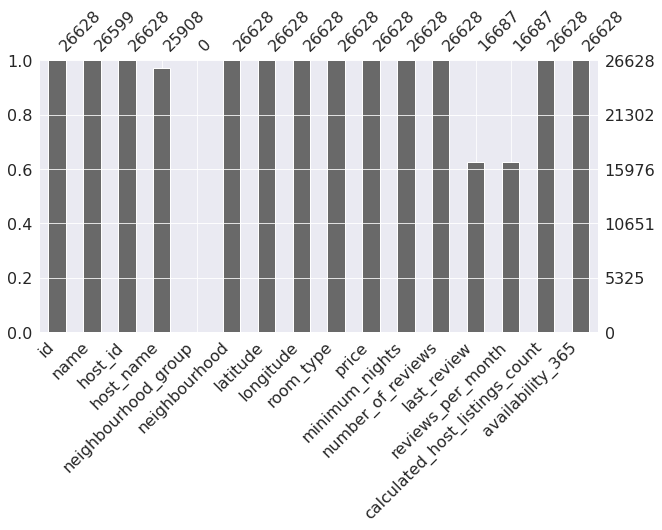

In [9]:
msno.bar (df, figsize = (10,5)); ##valores faltantes representados

Observamos acima que o dataset possui aproximadamente 26 mil entradas. Com a variável neighbourhood_group ausente de dados, podemos remover essa coluna no dataframe da análise. 



In [10]:
df.drop('neighbourhood_group', axis=1, inplace=True)

Porcentagem dos valores ausentes:

As colunas last_review e reviews_per_month contém 37,33% aproximadamente de dados ausentes, como podemos observar abaixo:

In [11]:
(df.isnull().sum() / len(df)).sort_values(ascending=False) * 100 #organizando por ordem decrescente as variáveis com valores ausentes


last_review                       37.332883
reviews_per_month                 37.332883
host_name                          2.703921
name                               0.108908
id                                 0.000000
host_id                            0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [12]:
df.nunique().sort_values(ascending=False) #valores distintos por ordem decrescente

id                                26628
name                              25881
host_id                           17349
longitude                         12278
latitude                           9873
host_name                          5062
price                              1611
last_review                        1491
reviews_per_month                   493
availability_365                    366
number_of_reviews                   272
neighbourhood                       151
minimum_nights                       67
calculated_host_listings_count       50
room_type                             4
dtype: int64

Histogramas das variáveis


Análise visual através de um gráfico de frequências.

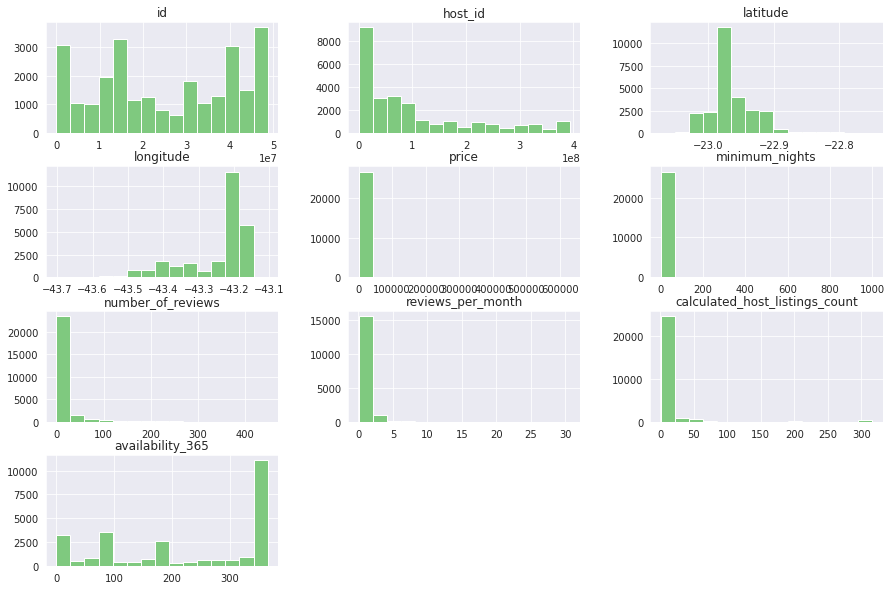

In [13]:
df.hist(bins=15, figsize=(15,10));

Percebemos outliers no gráfico, por exemplo: a coluna price, minimum_nights e calculated_host_listings_count. Por isso, não conseguimos visualizar uma distribuição sem distorção.

Detecção dos Outliers

In [14]:
##Detecção de outliers: 
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe().round(2)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,26628.00,26628.00,26628.00,16687.00,26628.00,26628.00
mean,749.77,4.75,12.22,0.61,10.02,226.60
std,5636.37,19.12,29.88,0.86,38.70,138.22
min,0.00,1.00,0.00,0.01,1.00,0.00
25%,150.00,1.00,0.00,0.09,1.00,89.00
50%,264.00,2.00,2.00,0.27,1.00,266.00
75%,536.00,4.00,9.00,0.81,3.00,364.00
max,629236.00,1000.00,447.00,30.65,316.00,365.00


Pontos observados pela análise com o método describe:

> * Valor mínimo da variável price é 0.00
> * Valor máximo da variavel price é 6.292
> * Valor minimo de minimum nights é de 1.00
> * Valor máximo da disponibilidade (availability_365), de fato, é 365 dias, bem como o mínimo.
> * Valor máximo de calculated_host_listings_count é 316.


Exemplo de boxplot das variáveis que apresentaram outliers

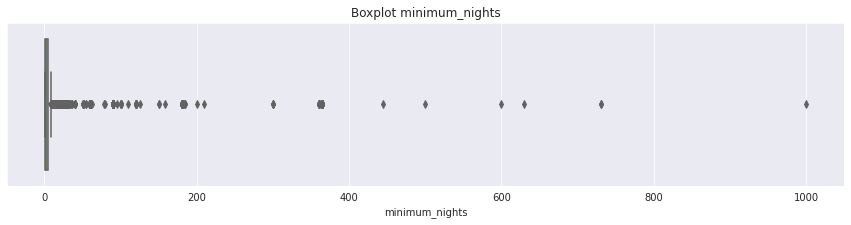

[minimun_nights]
Valores acima de 30: 213 entradas
Porcentagem: 0.7999%


In [15]:
plt.figure(figsize=(15,3))
sns.boxplot(data=df, x='minimum_nights')
plt.title('Boxplot minimum_nights')
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print(f'[minimun_nights]\nValores acima de 30: {len(df[df.minimum_nights > 30])} entradas')
print('Porcentagem: {:.4f}%'.format(len(df[df.minimum_nights > 30])/ len(df.minimum_nights)* 100))

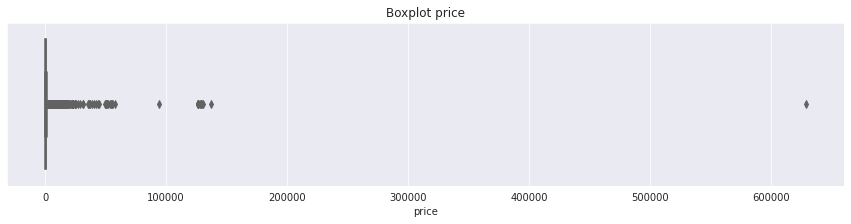

[price]
Valores acima de 1500: 1774 entradas
Porcentagem: 6.6622%


In [16]:
plt.figure(figsize=(15,3))
sns.boxplot(data=df, x='price')
plt.title('Boxplot price')
plt.show()

# ver quantidade de valores acima de 1500 para price
print(f'[price]\nValores acima de 1500: {len(df[df.price > 1500])} entradas')
print('Porcentagem: {:.4f}%'.format(len(df[df.price > 1500])/ len(df.price) * 100))

*Histograma* sem outlier para minimum_nights menor que 30 e price menor que 1500.

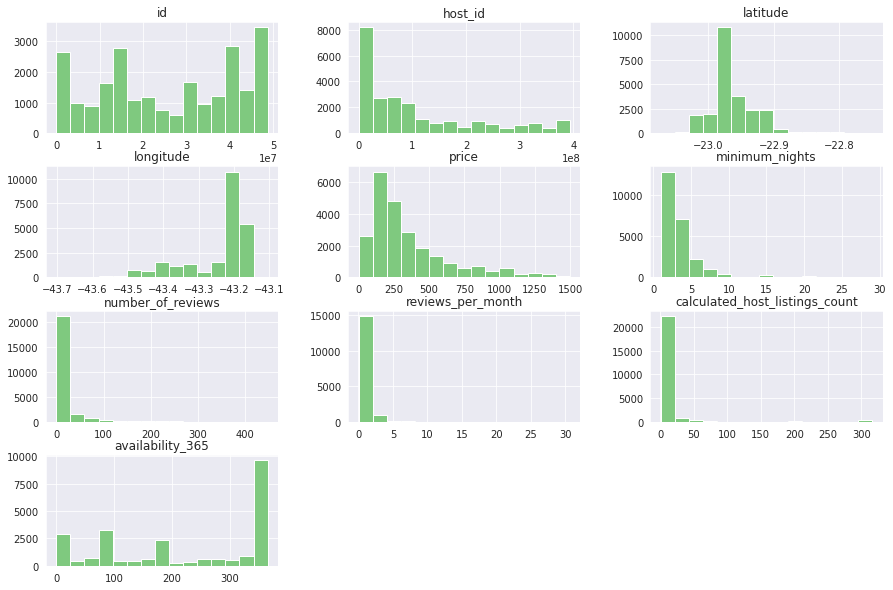

In [17]:
df_clean = df.copy()
df_clean = df_clean.query('minimum_nights <30 & price <1500')
df_clean.hist(bins=15, figsize=(15, 10));


Correlação das variáveis

Vamos calcular o coeficiente de correlação (relação estatística entre duas variáveis) com a função *corr*.

In [18]:
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
corr

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.175106,-0.158786,-0.172810,0.045518,0.083091
minimum_nights,0.175106,1.000000,-0.055617,-0.113003,-0.084599,-0.019029
number_of_reviews,-0.158786,-0.055617,1.000000,0.602593,-0.060408,-0.068298
reviews_per_month,-0.172810,-0.113003,0.602593,1.000000,-0.002263,-0.130038
calculated_host_listings_count,0.045518,-0.084599,-0.060408,-0.002263,1.000000,0.014333
availability_365,0.083091,-0.019029,-0.068298,-0.130038,0.014333,1.000000


Exemplificando visualmente a correlação através de um heatmap

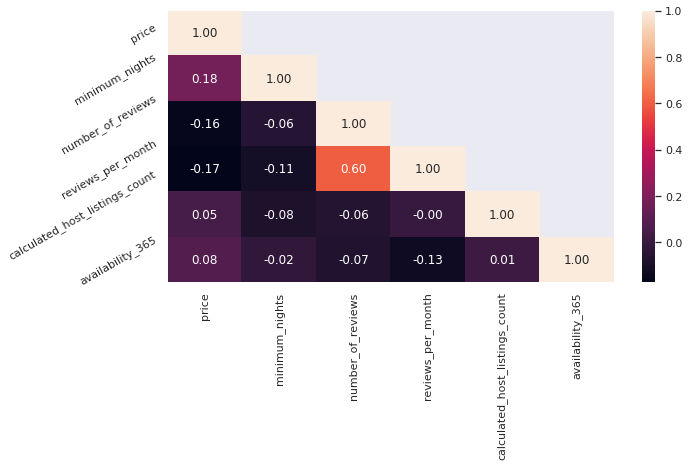

In [19]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(10,5))
# criando uma máscara para focar apenas nos valores de correlação 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Qual o tipo de hospedagem mais alugado?

In [20]:
df_clean['room_type'].value_counts() ##tipo de quarto (casa, quarto privativo, quarto compartilhado)


Entire home/apt    17078
Private room        6356
Shared room          591
Hotel room            91
Name: room_type, dtype: int64

Qual a localidade mais cara?

In [21]:
df_clean.groupby('neighbourhood') ['price'].mean().sort_values(ascending=False)[:10]

neighbourhood
Vista Alegre          1309.000000
Vaz Lobo               838.500000
Freguesia (Ilha)       761.500000
Realengo               693.142857
Osvaldo Cruz           622.250000
Paciência              574.571429
Inhoaíba               562.250000
Manguinhos             560.000000
Grumari                536.333333
Complexo do Alemão     520.000000
Name: price, dtype: float64

Curiosamente, muitos bairros que são da Zona Norte e Zona Oeste do Rio de Janeiro. É importante ressaltar que como existem bairros com mais imóveis alugados, isso pode influenciar diretamente na média de preços por localidade.

In [22]:
df_clean['neighbourhood'].value_counts() #imóveis por localidade

Copacabana          7221
Ipanema             2347
Barra da Tijuca     2259
Jacarepaguá         1200
Botafogo            1140
                    ... 
Cavalcanti             1
Água Santa             1
Vista Alegre           1
Gericinó               1
Magalhães Bastos       1
Name: neighbourhood, Length: 150, dtype: int64

Qual a média de preço das diárias?

In [29]:
print ("Média de preço de diárias")
print ("R$", df_clean.price.mean())

Média de preço de diárias
R$ 346.70405539890527


Plotando pela latitude e longitude

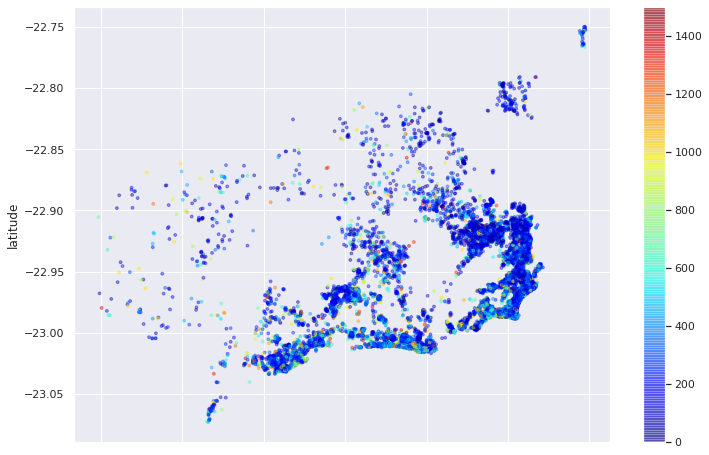

In [23]:
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

#Conclusão

Através de uma análise simples na base de dados do Airbnb de Março de 2021, conseguimos identificar valores ausentes e outliers e fazer o tratamento, bem como plotar alguns gráficos e responder algumas perguntas sobre o Rio de Janeiro.

Para essa análise, foi utilizado o dataset de *listings*, que é próprio para visualização de dados, portanto, relativamente menor. Para uma análise mais completa e com mais variáveis, a opção de *listings_gz* é mais apropriada.